In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

le = preprocessing.LabelEncoder()

In [4]:
df = pd.read_csv('sms_senior.csv', delimiter=',', encoding='mbcs')

In [5]:
df

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,"Sorry, left phone upstairs. OK, might be hecti...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,22,2017-03-31 21:13:00,no
5570,Tell me they're female :V how're you throwing ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,19,2017-03-31 22:19:00,no
5571,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,27,2017-03-31 23:15:00,yes
5572,Hey i've booked the pilates and yoga lesson al...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,11,2017-03-31 23:32:00,no


In [145]:
train_df = df[:]
test_df = df[:]

train_df['Date'] = le.fit_transform(train_df['Date'])
test_df['Date'] = le.fit_transform(test_df['Date'])

train_df['Full_Text'] = le.fit_transform(train_df['Full_Text'])
test_df['Full_Text'] = le.fit_transform(test_df['Full_Text'])

In [155]:
train_df

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,1490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,0,no
1,5009,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,1,no
2,4260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2,yes
3,809,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,3,no
4,194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,3718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,22,5569,no
5570,3807,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,19,5570,no
5571,176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,27,5571,yes
5572,1456,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,11,5572,no


In [169]:
train_labels = le.fit_transform(train_df.iloc[:, 153])
test_labels = le.fit_transform(test_df.iloc[:, 153])

In [170]:
train_features = [tuple(x) for x in train_df.iloc[:, 1:150].to_numpy()] #Full_text e Date são unicos e não contribuem com o aprendizado
test_features = [tuple(x) for x in test_df.iloc[:, 1:150].to_numpy()]

train_features_cwc = [tuple(x) for x in train_df.iloc[:, 1:151].to_numpy()]
test_features_cwc = [tuple(x) for x in test_df.iloc[:, 1:151].to_numpy()]

train_features_cwc_wc = [tuple(x) for x in train_df.iloc[:, 1:152].to_numpy()]
test_features_cwc_wc = [tuple(x) for x in test_df.iloc[:, 1:152].to_numpy()]

In [188]:
model = GaussianNB()
model.fit(train_features,train_labels)
a = metrics.accuracy_score(test_labels, model.predict(test_features))

model = GaussianNB()
model.fit(train_features_cwc,train_labels)
a_cwc = metrics.accuracy_score(test_labels, model.predict(test_features_cwc))

model = GaussianNB()
model.fit(train_features_cwc_wc,train_labels)
a_cwc_wc = metrics.accuracy_score(test_labels, model.predict(test_features_cwc_wc))

res = pd.DataFrame({'Accuracy':[a, a_cwc, a_cwc_wc]}, index =[149, 150, 151])

Text(0, 0.5, 'Accuracy')

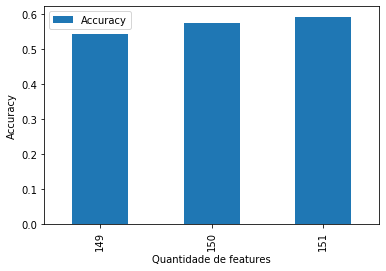

In [194]:
ax = res.plot(kind='bar')
ax.set_xlabel('Quantidade de features')
ax.set_ylabel('Accuracy')

In [195]:
print("Accuracy:", a)

Accuracy: 0.5444922856117689
